# Neuronale Netze programmieren 
## Version mit CNN und Pooling und möglichem Hochladen
### Datum: 28.12.2019
### Kurs: VHS Ludwigsburg - Maschinelles Lernen
In diesem Projekt geht es darum Kleidung zu kategorisieren. Einfach gesagt, wir trainieren unser neuronales Netz mit 70.000 Bildern von Kleidung und am Ende wollen wir ihm ein Bild der Kleidung zeigen und es soll vorhersagen, was es ist.

Die verwendete Datensammlung heiß MNIST Fashion.


## So sehen die BIlder in unserem Datenset aus
![Bilder der Kleidung](https://tensorflow.org/images/fashion-mnist-sprite.png)


## Programmtext

### Importieren der Bibliotheken und Befehle

In [82]:
%tensorflow_version 1.x   # Magic function um Tensorflow-Version festzulegen
import tensorflow as tf   # Importieren von Tensorflow
import numpy as np        # Importieren von Numpy
import matplotlib.pyplot as plt # Importieren Pyplotlib von Matplotlib
# --- Importieren von Kerasfunktionen für Neuronale Netze ---
from tensorflow.keras import models
from tensorflow.keras import regularizers
# --- Importieren Funktionen zum Bilder laden und Datenvorbehandlung
from keras.preprocessing import image
import cv2 # Hiermit wird OpenCV importiert
# --- Importieren Funktionen um auf Systemfunktionen zugreifen zu können
from google.colab import files
import os as os

`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `1.x   # Magic function um Tensorflow-Version festzulegen`. This will be interpreted as: `1.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


### Definieren von Systemvariablen und Konstanten

In [0]:
labels = ["T-Shirt oder Top", "Hose", "Pullover", "Kleid", "Mantel",
          "Sandale", "Shirt oder Oberhemd", "Sneaker", "Tasche", "Stiefel"]

abbruch_akkuranz = 0.999  # Bei Erreichen wird Optimierung abgebrochen

Anz_Epochen = 50 # Anzahl der berechneten Epochen

### Definition Callback-Funktion wenn gewünschte Akkuranz erreicht

In [0]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc') > abbruch_akkuranz):
      print("Das neuronale Netz ist akkurat genug.")
      self.model.stop_training = True

callbacks = myCallback()

### Definieren des neuronalen Netzes

In [0]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images = training_images.reshape(60000, 28, 28, 1)
training_images = training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images / 255.0

# Hier wird der eigentliche Aufbau der Layer (Art, Größe. Menge) definiert
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(30,(3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(400, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

### Trainieren des Netzes

In [86]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images,training_labels, epochs=Anz_Epochen, callbacks=[callbacks])

Train on 60000 samples
Epoch 1/50
60000/60000 [==============================] - 6s 105us/sample - loss: 0.4313 - acc: 0.8409
Epoch 2/50
60000/60000 [==============================] - 6s 104us/sample - loss: 0.2866 - acc: 0.8946
Epoch 3/50
60000/60000 [==============================] - 6s 101us/sample - loss: 0.2398 - acc: 0.9104
Epoch 4/50
60000/60000 [==============================] - 6s 104us/sample - loss: 0.2051 - acc: 0.9224
Epoch 5/50
60000/60000 [==============================] - 6s 103us/sample - loss: 0.1767 - acc: 0.9331
Epoch 6/50
60000/60000 [==============================] - 6s 104us/sample - loss: 0.1508 - acc: 0.9429
Epoch 7/50
60000/60000 [==============================] - 6s 100us/sample - loss: 0.1276 - acc: 0.9517
Epoch 8/50
60000/60000 [==============================] - 6s 101us/sample - loss: 0.1080 - acc: 0.9595
Epoch 9/50
60000/60000 [==============================] - 6s 101us/sample - loss: 0.0921 - acc: 0.9645
Epoch 10/50
60000/60000 [=========================

### Eigenschaften des erzeugten Modells

In [87]:
print(model.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 30)        300       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 13, 13, 30)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 11, 11, 64)        17344     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 400)               640400    
_________________________________________________________________
dense_17 (Dense)             (None, 10)               

## Test des neuronalen Netzes mit den Testbildern aus dem Datensatz

Das Netzwerk liefert für die Werte 0 - 9 Warscheinlichkeiten, wobei 0 - 9 jeweils für ein Kleidungsstück steht. Der Index mit der höchsten Wahrscheinlichkeit verweist auf das Produkt, um das es sich am Wahrscheinlichsten handelt.
Die Zuteilung ist hierbei wie folgt:

In [88]:
for i in range(0,10):
  print("Index ",i,"bedeutet:", labels[i])

Index  0 bedeutet: T-Shirt oder Top
Index  1 bedeutet: Hose
Index  2 bedeutet: Pullover
Index  3 bedeutet: Kleid
Index  4 bedeutet: Mantel
Index  5 bedeutet: Sandale
Index  6 bedeutet: Shirt oder Oberhemd
Index  7 bedeutet: Sneaker
Index  8 bedeutet: Tasche
Index  9 bedeutet: Stiefel


## Erstes Beispiel Kontrolle Lernerfolg

### Ausgabe Wahrscheinlichkeiten und Prognose

In [89]:
Auswahl = 5125 # Index des ausgewählten Bildes
classes = model.predict(test_images)
print("Wahrscheinlichkeiten:")
print(classes[Auswahl])
print("\n")
w = np.argmax(classes[Auswahl])
print("Wahrscheinlichstes Label:",w)
print("Es ist wahrscheinlich ein(e) ",labels[w])

Wahrscheinlichkeiten:
[1.4396068e-19 2.1461184e-29 9.9999988e-01 3.4025160e-20 1.5645152e-12
 6.1566906e-22 9.6973629e-08 7.0184236e-32 9.9263218e-20 5.3845723e-27]


Wahrscheinlichstes Label: 2
Es ist wahrscheinlich ein(e)  Pullover


### Grafische Ausgabe

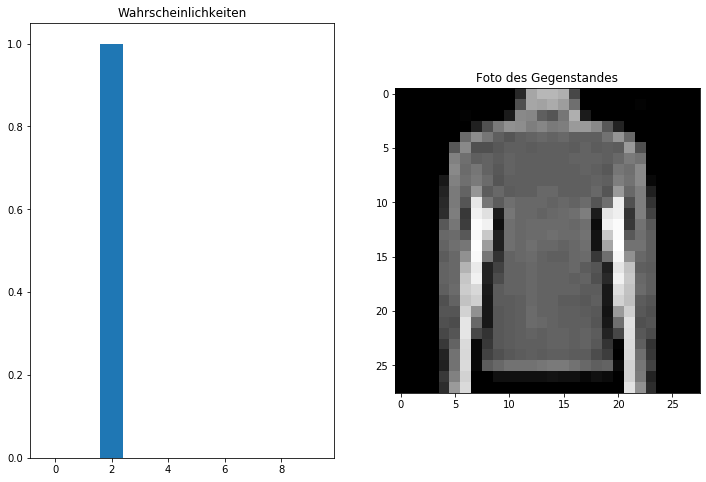

In [90]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
plt.figure(0, figsize=(12,8))
plt.subplot(1,2,1)
plt.title("Wahrscheinlichkeiten")
plt.bar(range(10), classes[Auswahl])
plt.subplot(1,2,2)
plt.title("Foto des Gegenstandes")
plt.imshow(test_images[Auswahl], cmap='Greys_r')
plt.show()

## Zweites Beispiel Kontrolle Lernerfolg

### Ausgabe Wahrscheinlichkeiten und Prognose

In [91]:
Auswahl2 = 2501 # Index des ausgewählten Bildes
print("Wahrscheinlichkeiten:")
print(classes[Auswahl2])
print("\n")
w = np.argmax(classes[Auswahl2])
print("Wahrscheinlichstes Label:",w)
print("Es ist wahrscheinlich ein(e) ",labels[w])

Wahrscheinlichkeiten:
[2.3276549e-20 2.1505517e-37 1.0000000e+00 1.2340293e-31 0.0000000e+00
 1.1814091e-34 9.0810514e-19 2.2686200e-38 2.8030662e-34 2.9810163e-26]


Wahrscheinlichstes Label: 2
Es ist wahrscheinlich ein(e)  Pullover


### Grafische Ausgabe

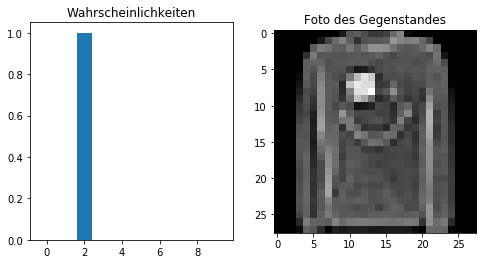

In [92]:
plt.figure(1, figsize=(8,4))
plt.subplot(1,2,1)
plt.title("Wahrscheinlichkeiten")
plt.bar(range(10), classes[Auswahl2])
plt.subplot(1,2,2)
plt.title("Foto des Gegenstandes")
plt.imshow(test_images[Auswahl2], cmap='Greys_r')
plt.show()

## Hochladen eigenes Bild

In [95]:
uploaded = files.upload()
#plt.figure(2, figsize = (8,8))
for fn in uploaded.keys():
  print("fn = ",fn)
  path = '/content/' + fn
  img_original = cv2.imread(path) 
  img_RGB = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)

  #in diesem Abschnitt formartieren wir unser Bild, damit es zu unserem neuronalen Netz passt
  img = cv2.resize(img_original,(28,28))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img_array = image.img_to_array(img, dtype=np.float32)
  print("Der Grauwert des oberen linken Pixels ist:", img_array[0,0])
  if img_array[0,0] > 245:
    # Das Bild hat einen weißen Hintergrund und muss invertiert werden
    print("Das Bild muss invertiert werden!")
    img_array -= 255
    img_array *= -1
  img_array = img_array / 255.0
  img_array = img_array.reshape(1, 28, 28, 1)
  img_neu = img_array[0,:,:,0]

  #in diesem Abschnitt lassen wir unser neuronales Netz einschätzen, um welches Kleidungsstück es sich handelt.
  classes = model.predict(img_array)
  prognose = classes[0]
  bester = np.argmax(prognose)



Saving 2020_01_07_Turnschuh.jpg to 2020_01_07_Turnschuh (2).jpg
fn =  2020_01_07_Turnschuh.jpg
Der Grauwert des oberen linken Pixels ist: [255.]
Das Bild muss invertiert werden!


### Anzeigen der Ergebnisse

### Ausgabe Wahrscheinlichkeiten und Prognose

In [96]:
print("Die Prognosenverteilung lautet:\n",prognose)
print("Beste Wahrscheinlichkeit für:", labels[bester])

Die Prognosenverteilung lautet:
 [1.7011471e-16 2.7748787e-22 8.4429663e-25 0.0000000e+00 5.5733300e-26
 1.6405812e-07 1.9257172e-18 9.9999988e-01 1.8415541e-32 4.0951612e-28]
Beste Wahrscheinlichkeit für: Sneaker


### Grafische Ausgabe

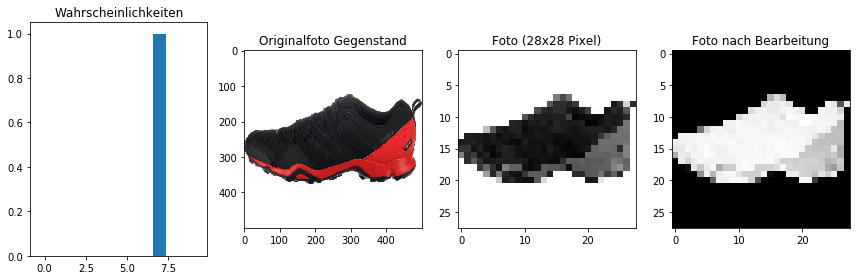

In [97]:

plt.figure(2, figsize=(12,4))
plt.subplot(1,4,1)
plt.title("Wahrscheinlichkeiten")
plt.bar(range(10), prognose)
plt.subplot(1,4,2)
plt.title("Originalfoto Gegenstand")
plt.imshow(img_RGB)
plt.subplot(1,4,3)
plt.title("Foto (28x28 Pixel)")
plt.imshow(img, cmap='Greys_r')
plt.subplot(1,4,4)
plt.title("Foto nach Bearbeitung")
plt.imshow(img_neu, cmap='Greys_r')
plt.tight_layout()
plt.show()


## Die Vorgänge in den Layern

Hier werden drei Bilder aus dem Testdatensatz ausgewählt und es wird dargestellt, wie sich die Ausgangsmatrix durch die entsprechenden Operationen in den Layern verändern.

### Betrachten des Inputs in das neurologische Netz

Das Input in das neurologische Netz hat folgendes Fornat

In [98]:
print(model.input)

Tensor("conv2d_16_input:0", shape=(?, 28, 28, 1), dtype=float32)


### Betrachten der einzelnen Outputs

In [99]:
layer_outputs = [layer.output for layer in model.layers]
print("Es gibt im Modell insgesamt",len(layer_outputs), "Layer (Schichten), die ein Output haben.")
print("Diese einzelnen Outputs haben folgende Eigenschaften:")
for i in range(0, len(layer_outputs)):
  print("Layer mit Index ",i,": Eigenschaften: ", layer_outputs[i])


Es gibt im Modell insgesamt 7 Layer (Schichten), die ein Output haben.
Diese einzelnen Outputs haben folgende Eigenschaften:
Layer mit Index  0 : Eigenschaften:  Tensor("conv2d_16/Relu:0", shape=(?, 26, 26, 30), dtype=float32)
Layer mit Index  1 : Eigenschaften:  Tensor("max_pooling2d_16/MaxPool:0", shape=(?, 13, 13, 30), dtype=float32)
Layer mit Index  2 : Eigenschaften:  Tensor("conv2d_17/Relu:0", shape=(?, 11, 11, 64), dtype=float32)
Layer mit Index  3 : Eigenschaften:  Tensor("max_pooling2d_17/MaxPool:0", shape=(?, 5, 5, 64), dtype=float32)
Layer mit Index  4 : Eigenschaften:  Tensor("flatten_8/Reshape:0", shape=(?, 1600), dtype=float32)
Layer mit Index  5 : Eigenschaften:  Tensor("dense_16/Relu:0", shape=(?, 400), dtype=float32)
Layer mit Index  6 : Eigenschaften:  Tensor("dense_17/Softmax:0", shape=(?, 10), dtype=float32)


### Definition eines Modells

In [0]:
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

### Eigenschaften des Modells

In [101]:
print(activation_model.summary())

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16_input (InputLayer) [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 26, 26, 30)        300       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 13, 13, 30)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 11, 11, 64)        17344     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 400)               6404

### Auswahl von Bildern aus dem Test-Datensatz

Es werden drei Bilder aus dem Test-Datensatz anhand ihres Index festgelegt und es festgelegt, bei welcher Convolution die Matrizen betrachtet werden sollen.

In [0]:
Bild_Auswahl = np.array([1, 251, 4444])
Bild_Auswahl_1 = 0
Bild_Auswahl_2 = 23
Bild_Auswahl_3 = 288
Convolution_Nummer = 20

In [0]:
beschriftung = ("26x26-Matrix", "13x13-Matrix", "11x11-Matrix", "5x5-Matrix")

### Grafische Ausgabe

Grafische Ausgabe, wie sich die Ursprungsmatrix verändert. Convolutional Neural Networks erzeugen Matrizen mit mehreren Layern, da mehrere Filter angewendet werden und je Filter ein Layer entsteht. Über "Convolutional_Nummer" kann man anschauen, welcher Layer angeschaut wird.

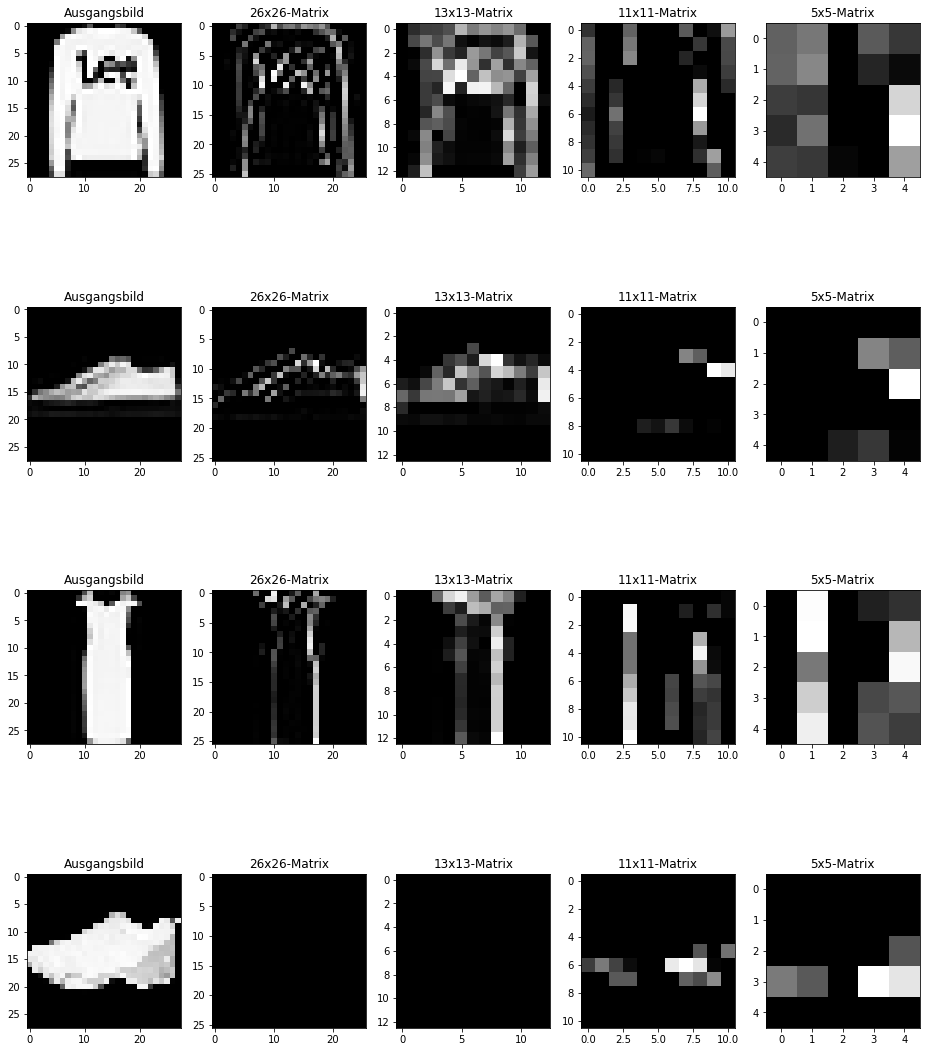

In [104]:
plt.figure(3, figsize = (16,20))
for x in range(0,3):
  plt.subplot(4,5,1+5*x)
  plt.title("Ausgangsbild")
  plt.imshow(test_images[Bild_Auswahl[x]], cmap='Greys_r')

plt.subplot(4,5,16)  
plt.imshow(img_neu, cmap='Greys_r')
plt.title("Ausgangsbild")

for x in range(0,4):
  f1 = activation_model.predict(test_images[Bild_Auswahl[0]].reshape(1, 28, 28, 1))[x]
  plt.subplot(4,5,(x+2))
  plt.imshow(f1[0, : , :, Convolution_Nummer], cmap='Greys_r')
  plt.title(beschriftung[x])
  f2 = activation_model.predict(test_images[Bild_Auswahl[1]].reshape(1, 28, 28, 1))[x]
  plt.subplot(4,5,5+(x+2))
  plt.imshow(f2[0, : , :, Convolution_Nummer], cmap='Greys_r')
  plt.title(beschriftung[x])
  f3 = activation_model.predict(test_images[Bild_Auswahl[2]].reshape(1, 28, 28, 1))[x]
  plt.subplot(4,5,10+(x+2))
  plt.imshow(f3[0, : , :, Convolution_Nummer], cmap='Greys_r')
  plt.title(beschriftung[x])
  f4 = activation_model.predict(img_array)[x]
  plt.subplot(4,5,15+(x+2))
  plt.imshow(f4[0, : , :, Convolution_Nummer], cmap='Greys_r')
  plt.title(beschriftung[x])
plt.show()
